### Тема: Корреляционный анализ

**Выполнил**: Лежнин Максим Витальевич (ПМ-31)

**Преподаватель**: Олейник Т.А., кафедра ВМ-1

###### Практическая работа № **10**, вариант № **3**

###### Осенний семестр, 2023 год

###### МИЭТ, Зеленоград

### Библиотеки

In [1]:
import numpy as np
import scipy
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn
import random

### Задание 1
Сгенерируйте выборку объема n двумерного нормального распределения с параметрами $m_X$, $m_Y$, $\sigma_X$, $\sigma_Y$, $\rho$ и выполните следующие действия:
- постройте диаграмму рассеяния;
- постройте гистограммы компонент;
- найдите выборочные характеристики компонент;
- найдите выборочное значение коэффициента корреляции Пирсона;
- постройте доверительный интервал для коэффициента корреляции;
- проверьте гипотезу о значимости коэффициента корреляции
Пирсона.
Сопоставьте полученные результаты с известными свойствами двумерного нормального распределения.

In [2]:
# доверительный интервал для коэффициента корреляции
def interval_for_cor(cor, sample_size, alpha=0.01):
    arc = np.arctanh(cor)
    u = sts.norm(0, 1).ppf(1 - alpha / 2) / np.sqrt(sample_size - 3)
    return (np.tanh(arc - u), np.tanh(arc + u))

# критерий для проверки гипотезы о значении коэффициента корреляции
def cor_test(rho_0, cor, sample_size):
    frac = lambda p: 0.5 * np.log((1 + p) / (1 - p))
    ssv = (frac(cor) - frac(rho_0)) * np.sqrt(sample_size - 3)
    p = 2 * min(sts.norm(0, 1).cdf(ssv), 1 - sts.norm(0, 1).cdf(ssv))
    return (ssv, p)

Выборочные значения характеристик:
Математическое ожидание X: 3.0350696867013474
Среднеквадратичное отклонение X: 4.983834728043983
Математическое ожидание Y: 4.9702127236522955
Среднеквадратичное отклонение Y: 9.994846424415334
Ковариационная матрица:
24.83860859645724 37.279472938939435 
37.279472938939435 99.89695504764798 

Коэффициент корреляции Пирсона: 0.7483934989557851
Доверительный интервал: (0.7396429293159468, 0.7568910632228222)

Критерий для проверки гипотезы о значении коэффициента корреляции:
Значение статистики: -0.3661384496723704
Значение p: 0.7142617678429931
Значение альфа: 0.05
0.05 < 0.7142617678429931 => гипотеза H_0 принимается


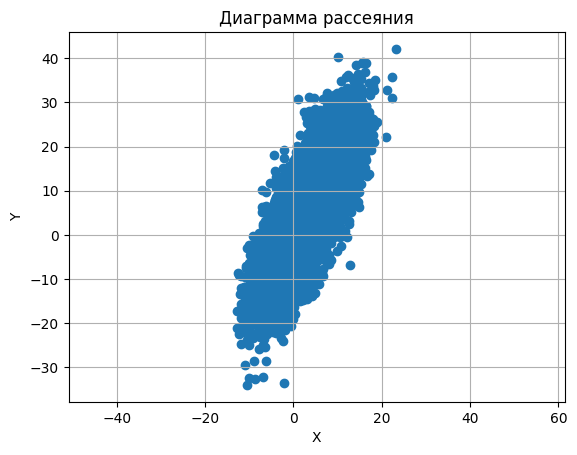

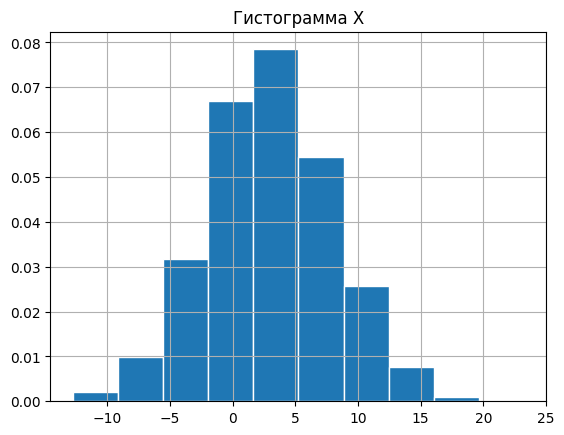

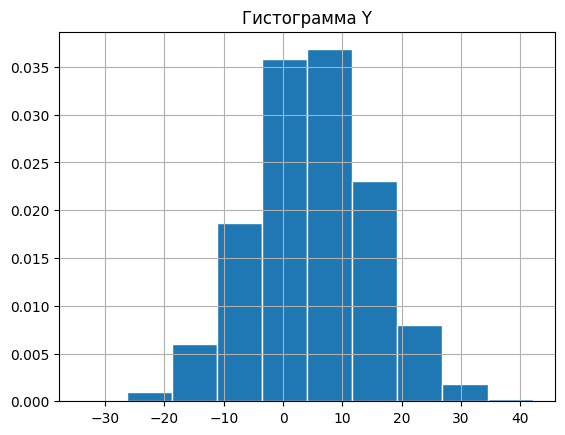

In [3]:
# значение альфа
alpha = 0.05

# характеристики двумерного нормального распределения
m_x = 3
sig_x = 5
var_x = sig_x ** 2

m_y = 5
sig_y = 10
var_y = sig_y ** 2

cor = 0.75
cov_xy = cor * sig_x * sig_y

# длина выборки и сама выборка
sample_size = 10000
sample = np.random.multivariate_normal([m_x, m_y], [[var_x, cov_xy], 
                                        [cov_xy, var_y]], sample_size)

# графики
plt.scatter(sample[:, 0], sample[:, 1])
plt.title("Диаграмма рассеяния")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid(True)

plt.figure()
plt.hist(sample[:, 0], edgecolor='w', density=True)
plt.title("Гистограмма X")
plt.grid(True)

plt.figure()
plt.hist(sample[:, 1], edgecolor='w', density=True)
plt.title("Гистограмма Y")
plt.grid(True)

# выборочные характеристики
mean_x, mean_y = sample.mean(axis=0)
cov_matrix = np.cov(sample, rowvar=False)
std_x, std_y = np.sqrt(cov_matrix[0][0]), np.sqrt(cov_matrix[1][1])

# вывод информации на экран
print("Выборочные значения характеристик:")
print(f"Математическое ожидание X: {mean_x}")
print(f"Среднеквадратичное отклонение X: {std_x}")
print(f"Математическое ожидание Y: {mean_y}")
print(f"Среднеквадратичное отклонение Y: {std_y}")
print("Ковариационная матрица:")
for row in cov_matrix:
    for elem in row:
        print(elem, end=" ")
    print()
print()

# считаю выборочную корреляцию
cor_pearson = cov_matrix[0][1] / (std_x * std_y)
print(f"Коэффициент корреляции Пирсона: {cor_pearson}")

# получаю доверительный интервал
interval = interval_for_cor(cor_pearson, sample_size, alpha)
print(f"Доверительный интервал: ({interval[0]}, {interval[1]})")
print()

# получаю p-значения критерия о значении корреляции
# H_0: rho = 0.75 (то есть корреляция выборки равна кореляции из построения)
# H_1: двусторонняя альтернатива
test_data = cor_test(cor, cor_pearson, sample_size)
print("Критерий для проверки гипотезы о значении коэффициента корреляции:")
print(f"Значение статистики: {test_data[0]}")
print(f"Значение p: {test_data[1]}")

# проверяю гипотезу при заданном альфа
print(f"Значение альфа: {alpha}")
if alpha < test_data[1]:
    print(f"{alpha} < {test_data[1]} => гипотеза H_0 принимается")
else:
    print(f"{alpha} >= {test_data[1]} => гипотеза H_0 отвергается")

### Задание 2
Случайный вектор $\left( X,\, Y \right)$ имеет круговое нормальное распределение. Пусть $V = X \cdot Y,\ W = 0.5 \left( X^2 - Y^2 \right)$. Методом статистического эксперимента исследуйте вопрос о корреляционной зависимости величин $V$ и $W$. Возникшую гипотезу проверьте различными способами.

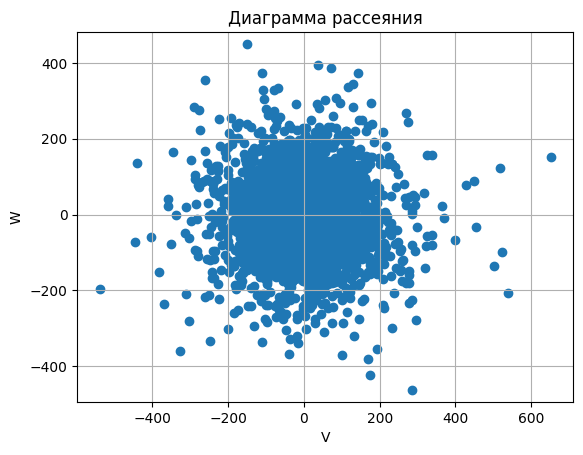

In [4]:
# характеристики кругового нормального распределения
m = 0
sig = 8
cor = 0
cov = cor * sig**2

# размер выборки
sample_size = 10000

# изначальная круговая выборка
XY_sample = np.random.multivariate_normal([m, m], [[sig**2, cov], [cov, sig**2]], 
                                                                      sample_size)

# выборка величин V и W
VW_sample = np.array([[x * y, 0.5 * (x**2 - y**2)] for (x, y) in XY_sample])

# диаграмма рассеяния
plt.scatter(VW_sample[:, 0], VW_sample[:, 1])
plt.title("Диаграмма рассеяния")
plt.xlabel('V')
plt.ylabel('W')
plt.axis('equal')
plt.grid(True)

Диаграмма рассеяния круглая, что явно указывает на отсутствие зависимости между величинами. Проверим это с помощью критерия о значении коэффициента корреляции, где в качестве нулевой гипотезу возьму $\rho = 0$.

In [5]:
# считаю значение p (по собственной функции)
cov_matrix = np.cov(VW_sample, rowvar=False)
std_v, std_w = np.sqrt(cov_matrix[0][0]), np.sqrt(cov_matrix[1][1])
cor_pearson = cov_matrix[0][1] / (std_v * std_w)

test_data = cor_test(0, cor_pearson, sample_size)
print(f"Значение p: {test_data[1]}")

Значение p: 0.0049273832082507366


Значение p достаточно высокое, чтобы мы могли принять нулевую гипотезу. Проверим на встроенной функции pearsonr из модуля scypy. Эта функция выдает значение корреляции Пирсона и p-значение при нулевой гипотезе $\rho = 0$.

In [6]:
# считаю p значение встроенной функцией
cor, p = sts.pearsonr(VW_sample[:, 0], VW_sample[:, 1])
print(f"Значение p: {p}")

Значение p: 0.004929144297994308


Значения p совпадают с достаточной высокой точностью.

### Задание 3
В файле «Данные 10_1» приведены результаты наблюдаемых значений десяти непрерывных случайных величин. В соответствии с вашим вариантом отберите три выборки и исследуйте их по следующему плану:
- для каждой пары выборок из вашего набора постройте диаграмму рассеивания;
- для каждой из трех выборок постройте гистограммы и найдите выборочные характеристики;
- для каждой пары выборок найдите выборочное значение коэффициента корреляции Пирсона и выборочное значение рангового коэффициента корреляции Спирмена (для визуализации выборочных значений коэффициентов корреляции используйте тепловую карту); сопоставьте результаты;
- для пары выборок с наименьшим по модулю значением выборочного коэффициента корреляции проверьте гипотезу о значимости коэффициента корреляции Спирмена.

In [7]:
# функция для обработки файла данных
def parse(table, cols):
    samples = []
    for col in cols:
        samples.append([round(i, 5) for i in table[table.columns[col]].fillna(-1)])
        
    for i in range(len(cols)):
        while -1 in samples[i]:
            index = samples[i].index(-1)
            for j in range(len(cols)):
                samples[j].pop(index)

    return samples

Пара выборок с наименьшей корреляцией (0.543988383824994): ОМА и КПрАиГ
Значение p для гипотезы о значении корреляции Спирмена: 0.2882159668432198
Значение альфа: 0.05
0.05 < 0.2882159668432198 => гипотеза H_0 о значении корреляции принимается


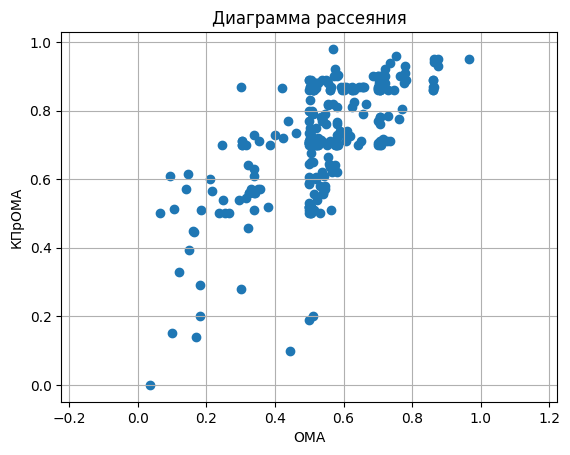

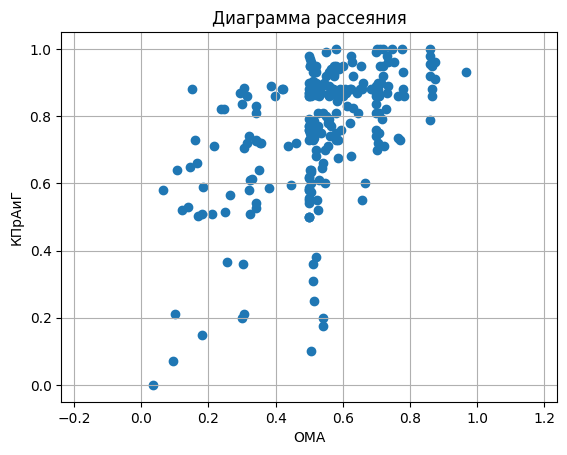

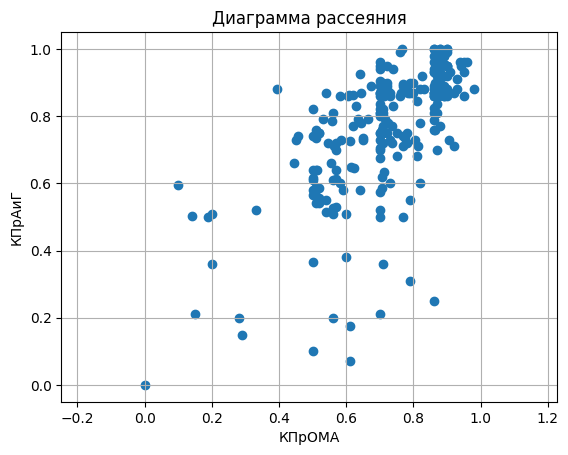

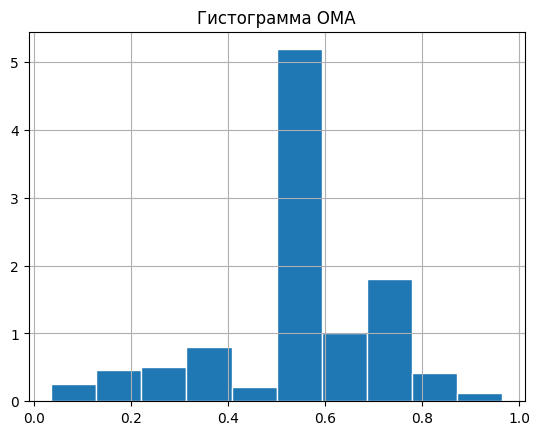

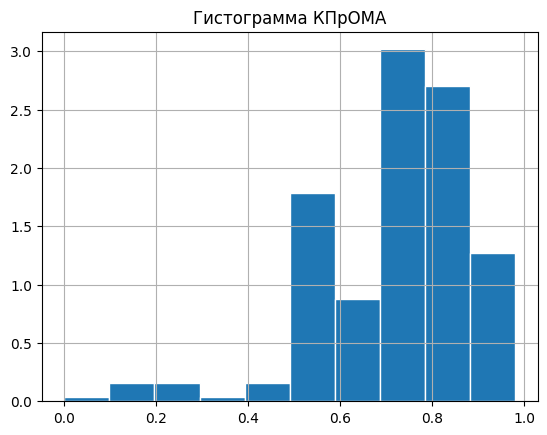

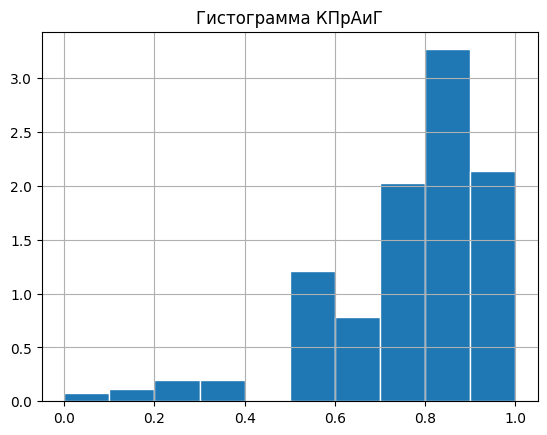

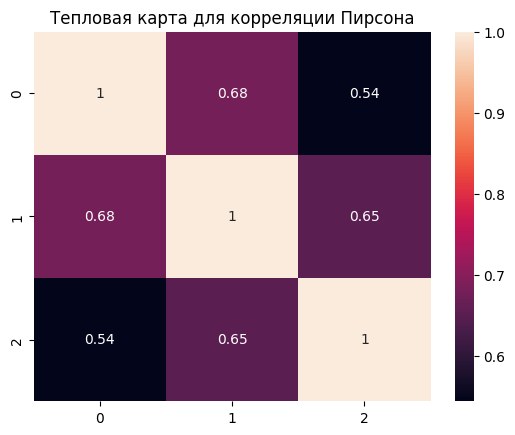

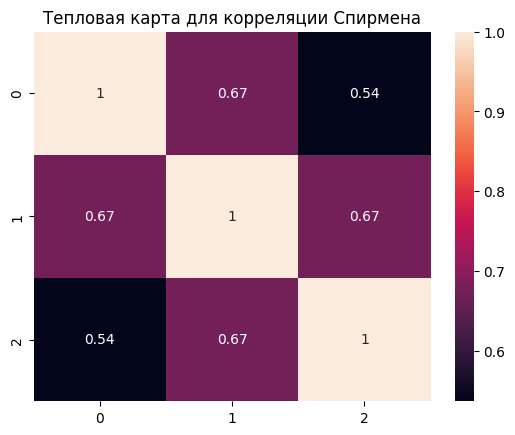

In [8]:
# считаываю данные
data = pd.read_excel('Data_10_1.xlsx')
table = pd.DataFrame(data)

# случайным образом беру 3 выборки
sample_nums = sorted(random.sample(range(0, 7), 3))
samples = parse(table, sample_nums)

# запоминаю имена этих выборок
names = [table.columns[num] for num in sample_nums]

# заготовки корреляционных матриц
pearson_cor_matrix = np.identity(3)
spearman_cor_matrix = np.identity(3)

# строю диаграммы рассеяния для каждых двух выборок
# и считаю коэффициенты корреляции
for i in range(len(names)):
    for j in range(i + 1, len(names)):
        plt.figure()
        plt.scatter(samples[i], samples[j])
        plt.title("Диаграмма рассеяния")
        plt.xlabel(names[i])
        plt.ylabel(names[j])
        plt.axis('equal')
        plt.grid(True)

        pearson_coef = sts.pearsonr(samples[i], samples[j])[0]
        pearson_cor_matrix[i][j] = pearson_coef
        pearson_cor_matrix[j][i] = pearson_coef
        
        spearman_coef = sts.spearmanr(samples[i], samples[j])[0]
        spearman_cor_matrix[i][j] = spearman_coef
        spearman_cor_matrix[j][i] = spearman_coef

# строю гистограммы данных выборок
for i in range(len(names)):
    plt.figure()
    plt.hist(samples[i], edgecolor='w', density=True)
    plt.title(f"Гистограмма {names[i]}")
    plt.grid(True)

# строю тепловые карты корреляционных матриц
plt.figure()
plt.title("Тепловая карта для корреляции Пирсона")
seaborn.heatmap(pearson_cor_matrix, annot=True)

plt.figure()
plt.title("Тепловая карта для корреляции Спирмена")
seaborn.heatmap(spearman_cor_matrix, annot=True)

# нахожу выборки с наименьшей корреляцией
min_cor = 1
i_min, j_min = 0, 0
for i in range(len(pearson_cor_matrix)):
    for j in range(i + 1, len(pearson_cor_matrix)):
        if pearson_cor_matrix[i][j] < min_cor:
            min_cor = pearson_cor_matrix[i][j]
            i_min, j_min = i, j

# применяю критерий о значении корреляции (на равенство корреляции Спирмена)
print(f"Пара выборок с наименьшей корреляцией ({min_cor}):",
      f"{names[i_min]} и {names[j_min]}")
p = cor_test(spearman_cor_matrix[i_min][j_min], 
             pearson_cor_matrix[i_min][j_min], sample_size)[1]
print(f"Значение p для гипотезы о значении корреляции Спирмена: {p}")

# проверяю гипотезу при заданном альфа
alpha = 0.05

print(f"Значение альфа: {alpha}")
if alpha < p:
    print(f"{alpha} < {p} => гипотеза H_0 о значении корреляции принимается")
else:
    print(f"{alpha} >= {p} => гипотеза H_0 о значении корреляции отвергается")

Из тепловых карт видно, что корреляция Спирмена не особо отличается от корреляции Пирсона в значениях (разница где-то $\pm 0.03$). 

### Задание 4
Пусть генеральная совокупность имеет нормальный закон распределения. Что можно сказать о наличии корреляционной зависимости между случайными величинами – выборочной оценкой математического ожидания и исправленной выборочной дисперсией? Для выдвижения гипотезы используйте статистический эксперимент.

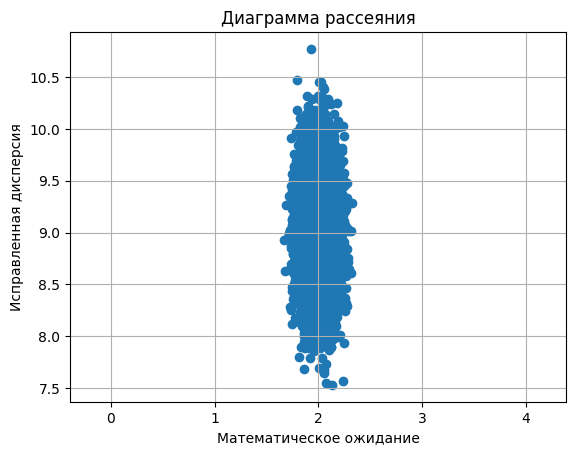

In [9]:
# характеристики нормального закона
m = 2
sig = 3

# размер двумерной выборки
sample_size = 10000
# размеры выборок, из которых берутся выборочные оценки
sub_sample_size = 1000

# листы для выборок оценок
mean = []
var = []

# получаю выборки оценок
for i in range(sample_size):
    sample = np.random.normal(m, sig, sub_sample_size)
    mean.append(sample.mean())
    var.append(sample.var(ddof=1))

# строю диаграмму рассеяния
plt.scatter(mean, var)
plt.title("Диаграмма рассеяния")
plt.xlabel('Математическое ожидание')
plt.ylabel('Исправленная дисперсия')
plt.axis('equal')
plt.grid(True)

Судя по диаграмме, зависимость между выборочным ожиданием и исправленной выборочной дисперсией не наблюдается. Проверим при нулевой гипотезе $\rho = 0$:

In [10]:
# считаю значение p
cov_matrix = np.cov([mean, var])
std_mean, std_var = np.sqrt(cov_matrix[0][0]), np.sqrt(cov_matrix[1][1])
cor_pearson = cov_matrix[0][1] / (std_mean * std_var)

test_data = cor_test(0, cor_pearson, sample_size)
print(f"Значение p: {test_data[1]}")

Значение p: 0.568561285638822


Значение p достаточно высокое, чтобы можно было сказать, что корреляционной зависимости нет.